# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 2

In [2]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
#%matplotlib inline

In [3]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [112]:
df.head().T

,0,72701,72696,72681,72667
dateCrawled,2016-03-24 11:52:17,2016-03-22 12:55:43,2016-03-16 14:49:55,2016-03-10 17:57:44,2016-03-17 21:54:41
name,Golf_3_1.6,Astra_F_wegen_Neuanschaffung_abzugeben,Suchen_VW_Caddy_7__Sitzer,Corolla_E10_Bastler_KEIN_TÃV_Fahrbereit,Mercedes_Benz_C_180_1.8_l_Kombi_Klima
seller,privat,privat,privat,privat,privat
offerType,Offer,Offer,Offer,Offer,Offer
price,480,200,1,350,950
abtest,test,control,test,control,test
vehicleType,Other,Other,Other,Other,Other
yearOfRegistration,1993,2000,2009,2000,2016
gearbox,manuell,Unspecified,Unspecified,automatik,manuell
powerPS,0,0,0,0,122


## Número de veículos pertencentes a cada marca

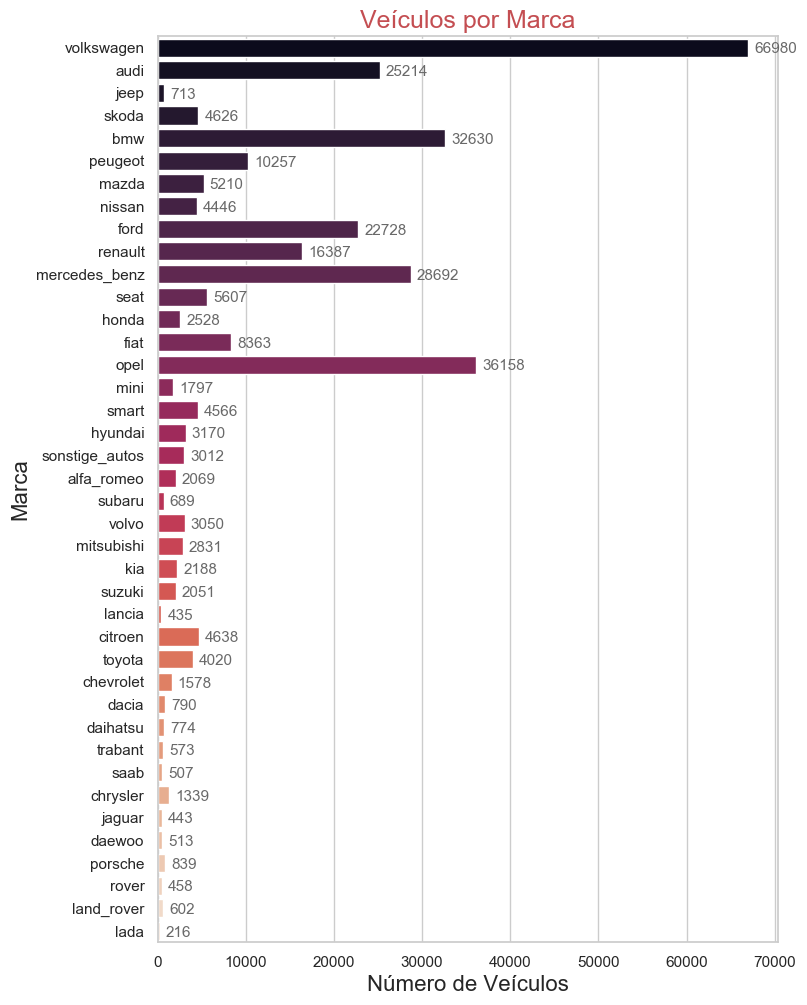

In [31]:
# Crie um Plot que mostre o número de veículos pertencentes a cada marca
plt.figure(figsize=(8, 12), dpi=100)
sns.set_style("whitegrid")

fontsize = 16
titlesize = 18
fig_sns = sns.countplot(y = "brand", data = df, palette="rocket")
plt.xlabel('Número de Veículos', fontsize=fontsize)
plt.ylabel('Marca', fontsize=fontsize)
plt.title('Veículos por Marca', fontsize=titlesize, color='r')

for i in fig_sns.patches:
    # get_width pulls left or right; get_y pushes up or down
    fig_sns.text(i.get_width()+700, i.get_y()+0.65, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')
    
plt.show()

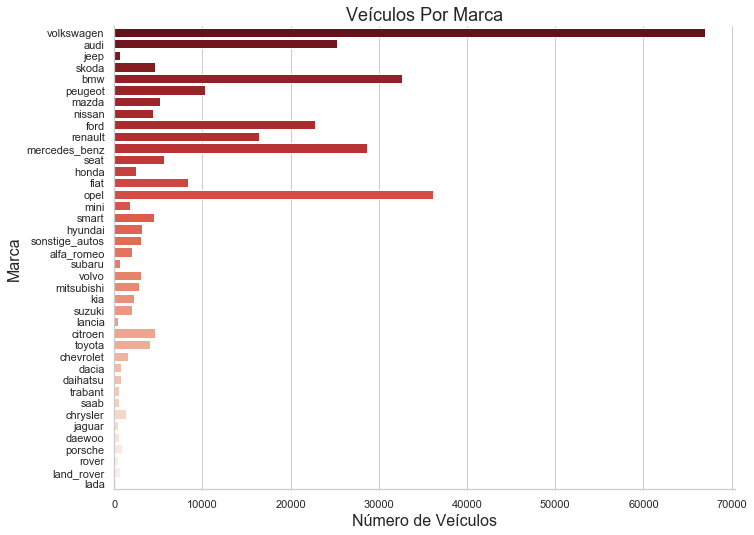

In [32]:
# Crie um Plot que mostre o número de veículos pertencentes a cada marca
sns.set_style("whitegrid")
g = sns.catplot(y="brand", data=df, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("Veículos Por Marca",fontdict={'size':18})
g.ax.xaxis.set_label_text("Número de Veículos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Marca",fontdict= {'size':16})
plt.show()


In [34]:
# Salvando o plot
g.savefig(("plots/Analise2/brand-vehicleCount.png"))
fig = fig_sns.get_figure()
fig.savefig(("plots/Analise2/brand-vehicleCount-my.png"))

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

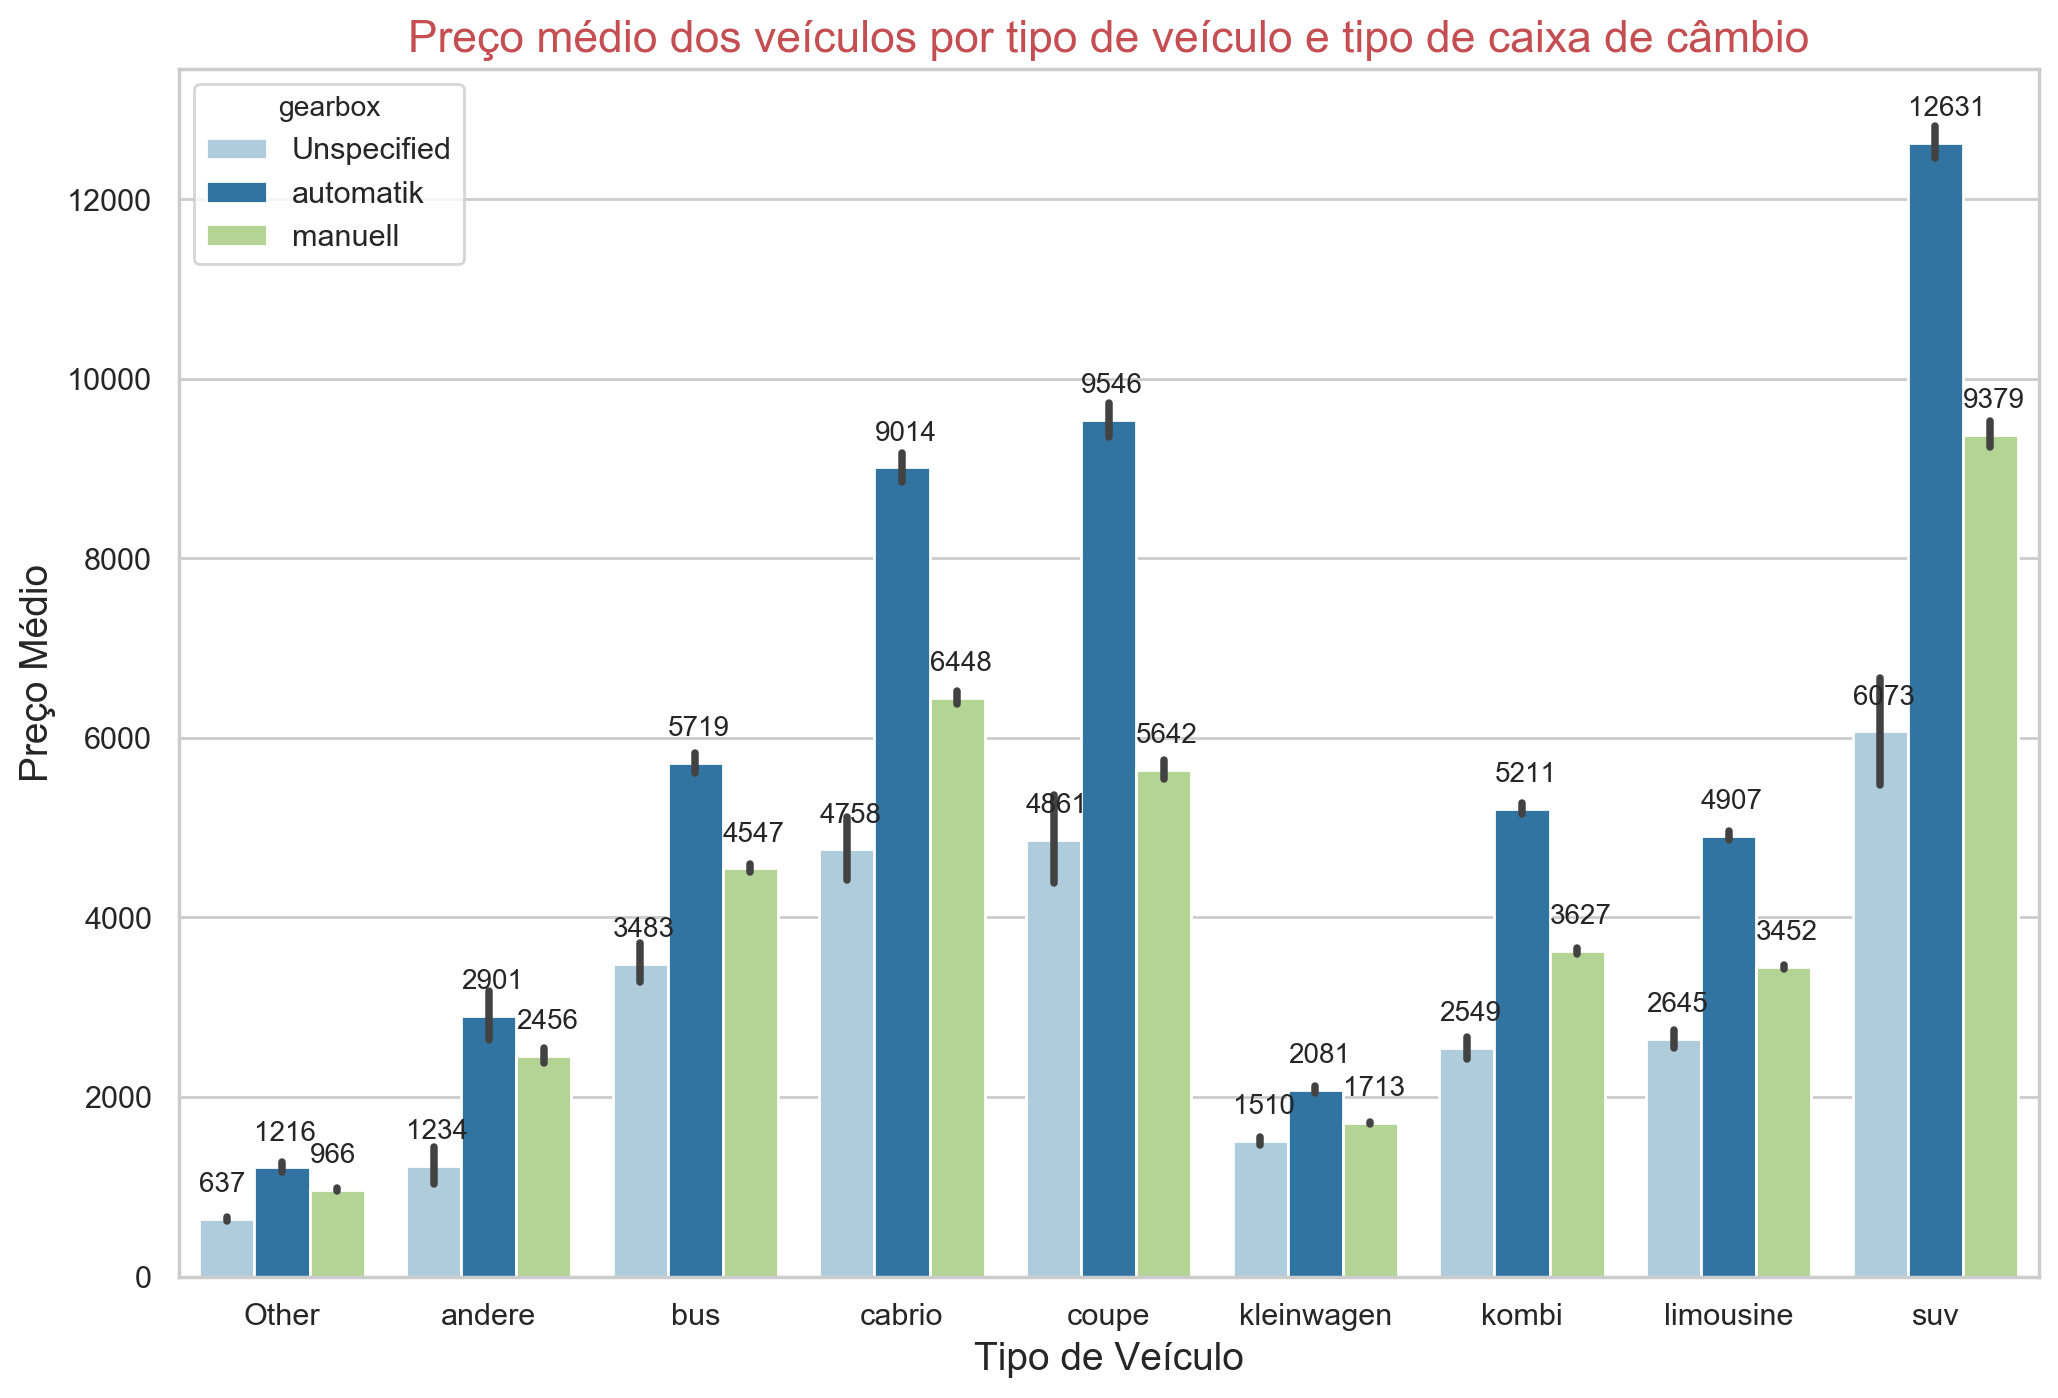

In [35]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
plt.figure(figsize=(12, 8), dpi=200)

fontsize = 14
titlesize = 16

order_gearbox = df.groupby('gearbox').count().index
order_typeveh = df.groupby('vehicleType').count().index

fig_sns = sns.barplot(x="vehicleType", y="price", hue="gearbox", order = order_typeveh, hue_order= order_gearbox, \
                      data=df, palette="Paired", estimator= np.mean )
plt.xlabel('Tipo de Veículo', fontsize=fontsize)
plt.ylabel('Preço Médio', fontsize=fontsize)
plt.title('Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio', fontsize=titlesize, color='r')


media = df.groupby(['gearbox','vehicleType'])['price'].mean().astype(int)
for p, label in zip(fig_sns.patches, media):
    fig_sns.annotate(label, (p.get_x()+0, p.get_height()+300))


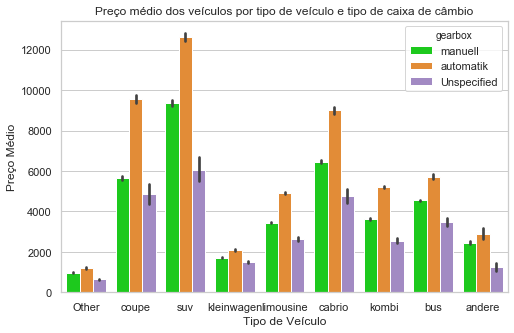

In [36]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)
ax.set_title("Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
plt.show()

In [37]:
# Salvando o plot
fig.savefig("plots/Analise2/vehicletype-gearbox-price.png")
fig = fig_sns.get_figure()
fig.savefig("plots/Analise2/vehicletype-gearbox-price-my.png")

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>